In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})

### 데이터 정리하기

In [2]:
population = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv', sep=',', encoding='CP949')
population.rename(columns = {'합계':'인구수'}, inplace=True)
population.fillna(' ', inplace=True)
population = population[(population['시군구'] != '소계')]
population = population[(population['행정구'] != '소계')]
population.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,,계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


In [3]:
population.loc[population['구분'] == '계', '구분'] = '합계'
population.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,,합계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,,합계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


In [4]:
population['20~39세'] = population['20~24세'] + population['25~29세'] + population['30~34세'] + population['35~39세']
population['65세이상'] = population['65~69세'] + population['70~74세'] + population['75~79세'] + population['80~84세'] + population['85세이상']

population.head(10)

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
3,서울,종로구,,합계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,,합계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614
8,서울,중구,,여자,59845,4851,2000,4408,5189,4846,...,4726,4956,4572,3213,2782,2406,1578,1172,19327,11151
9,서울,용산구,,합계,204196,19559,7501,11472,17506,17246,...,16489,16246,14708,9927,8197,7027,4763,3009,64265,32923
10,서울,용산구,,남자,97390,10065,3759,4330,8410,8569,...,8072,7884,7103,4649,3653,2997,1831,998,30377,14128
11,서울,용산구,,여자,106806,9494,3742,7142,9096,8677,...,8417,8362,7605,5278,4544,4030,2932,2011,33888,18795
12,서울,성동구,,합계,283330,30197,10671,18283,24581,23496,...,22648,23060,20026,13394,10709,8671,5088,2895,91871,40757


In [5]:
pop = pd.pivot_table(population,
                    index = ['광역시도', '시군구', '행정구'],
                    columns = ['구분'],
                    values = ['인구수', '20~39세', '65세이상'])
pop

20~39세                65세이상                   인구수          \
구분                 남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                              
강원    강릉시       25015  20993  46008  17378  23119  40497  101154  101903   
      고성군        2307   1699   4006   2957   4048   7005   11933   11688   
      동해시        8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시        7148   5280  12428   6314   8639  14953   31630   30203   
      속초시        8517   7411  15928   5866   8144  14010   37488   38814   
...               ...    ...    ...    ...    ...    ...     ...     ...   
충북    청주시  상당구  20426  19444  39870  11028  14557  25585   82711   85162   
           서원구  27838  25609  53447  11415  15049  26464   97386   99616   
           청원구  30875  26880  57755   9432  12476  21908   95997   92726   
           흥덕구  38895  36141  75036  11543  14797  26340  124808  124118   
      충주시       25700  21483  47183  16091  21483  37574  101311   99746   

                        
구분                  합계  
광역시도 시군구  행정구           
강원    강릉시       203057  
      고성군        23621  
      동해시        83888  
      삼척시        61833  
      속초시        76302  
...                ...  
충북    청주시  상당구  167873  
           서원구  197002  
           청원구  188723  
           흥덕구  248926  
      충주시       201057  

[250 rows x 9 columns]

In [6]:
pop['소멸비율'] = pop['20~39세', '여자'] / (pop['65세이상', '합계'] / 2)
pop.head()

20~39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                             
강원    강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
      고성군       2307   1699   4006   2957   4048   7005   11933   11688   
      동해시       8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
      속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                           소멸비율  
구분                 합계            
광역시도 시군구  행정구                    
강원    강릉시      203057  1.036768  
      고성군       23621  0.485082  
      동해시       83888  0.929916  
      삼척시       61833  0.706213  
      속초시       76302  1.057959

In [7]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20~39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                             
강원    강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
      고성군       2307   1699   4006   2957   4048   7005   11933   11688   
      동해시       8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
      속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                           소멸비율 소멸위기지역  
구분                 합계                   
광역시도 시군구  행정구                           
강원    강릉시      203057  1.036768  False  
      고성군       23621  0.485082   True  
      동해시       83888  0.929916   True  
      삼척시       61833  0.706213   True  
      속초시       76302  1.057959  False

In [8]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index([' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군', ' 철원군',
       ' 태백시', ' 평창군', ' 홍천군', ' 화천군', ' 횡성군', ' 가평군', ' 양평군', ' 여주시', ' 연천군',
       ' 거창군', ' 고성군', ' 남해군', ' 밀양시', ' 사천시', ' 산청군', ' 의령군', ' 창녕군', ' 하동군',
       ' 함안군', ' 함양군', ' 합천군', ' 경주시', ' 고령군', ' 군위군', ' 김천시', ' 문경시', ' 봉화군',
       ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 동구', ' 영도구', ' 중구', ' 강화군', ' 옹진군',
       ' 강진군', ' 고흥군', ' 곡성군', ' 구례군', ' 담양군', ' 보성군', ' 신안군', ' 영광군', ' 영암군',
       ' 완도군', ' 장성군', ' 장흥군', ' 진도군', ' 함평군', ' 해남군', ' 화순군', ' 고창군', ' 김제시',
       ' 남원시', ' 무주군', ' 부안군', ' 순창군', ' 완주군', ' 임실군', ' 장수군', ' 정읍시', ' 진안군',
       ' 공주시', ' 금산군', ' 논산시', ' 보령시', ' 부여군', ' 서천군', ' 예산군', ' 청양군', ' 태안군',
       ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 제천시'],
      dtype='object', name='시군구')

In [9]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시군구 행정구 20~39세                65세이상                   인구수          \
구분                    남자     여자     합계     남자     여자     합계      남자      여자   
0    강원   강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
1    강원   고성군       2307   1699   4006   2957   4048   7005   11933   11688   
2    강원   동해시       8801   7510  16311   7075   9077  16152   42093   41795   
3    강원   삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
4    강원   속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                소멸비율 소멸위기지역  
구분      합계                   
0   203057  1.036768  False  
1    23621  0.485082   True  
2    83888  0.929916   True  
3    61833  0.706213   True  
4    76302  1.057959  False

In [10]:
tmp_coloumns = [pop.columns.get_level_values(0)[n] +
                pop.columns.get_level_values(1)[n]
                for n in range(len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head(30)

,광역시도,시군구,행정구,20~39세남자,20~39세여자,20~39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원,강릉시,,25015,20993,46008,17378,23119,40497,101154,101903,203057,1.036768,False
1,강원,고성군,,2307,1699,4006,2957,4048,7005,11933,11688,23621,0.485082,True
2,강원,동해시,,8801,7510,16311,7075,9077,16152,42093,41795,83888,0.929916,True
3,강원,삼척시,,7148,5280,12428,6314,8639,14953,31630,30203,61833,0.706213,True
4,강원,속초시,,8517,7411,15928,5866,8144,14010,37488,38814,76302,1.057959,False
5,강원,양구군,,2640,2016,4656,1784,2339,4123,10272,9628,19900,0.977929,True
6,강원,양양군,,2210,1810,4020,3240,4165,7405,12599,12526,25125,0.488859,True
7,강원,영월군,,2756,2227,4983,4458,5593,10051,17530,16812,34342,0.443140,True
8,강원,원주시,,42417,40779,83196,20273,26564,46837,163155,166719,329874,1.741316,False
9,강원,인제군,,3581,2739,6320,2591,3202,5793,14807,13412,28219,0.945624,True


In [11]:
len(pop)

250

In [12]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      250 non-null    object 
 1   시군구       250 non-null    object 
 2   행정구       250 non-null    object 
 3   20~39세남자  250 non-null    int64  
 4   20~39세여자  250 non-null    int64  
 5   20~39세합계  250 non-null    int64  
 6   65세이상남자   250 non-null    int64  
 7   65세이상여자   250 non-null    int64  
 8   65세이상합계   250 non-null    int64  
 9   인구수남자     250 non-null    int64  
 10  인구수여자     250 non-null    int64  
 11  인구수합계     250 non-null    int64  
 12  소멸비율      250 non-null    float64
 13  소멸위기지역    250 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 25.8+ KB


In [13]:
si_name = [None] * len(pop)

for n in pop.index:
    # 고성처리
    if pop['시군구'][n][:-1] ==' 고성':
        if pop['광역시도'][n]=='강원':
            si_name[n] = f"고성(강원)"
        else:
            si_name[n] = f"고성(경남)"
    # 구로 끝나는 시군구 처리
    elif pop['광역시도'][n] in ['인천', '울산', '부산', '대구', '대전', '광주', '서울']:
        if len(pop['시군구'][n]) == 3:
            si_name[n] = f"{pop['광역시도'][n]} {pop['시군구'][n][1:]}"
        else:
            si_name[n] = f"{pop['광역시도'][n]} {pop['시군구'][n][1:-1]}"
    # 그 외 행정구 정리
    elif pop['행정구'][n] == ' ':
        si_name[n] = f"{pop['시군구'][n][1:-1]}"
    elif pop['행정구'][n] in [' 마산합포구', ' 마산회원구']:
        si_name[n] = f"{pop['시군구'][n][1:-1]} {pop['행정구'][n][3:-1]}"
    elif len(pop['행정구'][n]) == 3:
        si_name[n] = f"{pop['시군구'][n][1:-1]} {pop['행정구'][n][1:]}"
    else:
        si_name[n] = f"{pop['시군구'][n][1:-1]} {pop['행정구'][n][1:-1]}"
    """# 부천시 정리
    elif pop['시군구'][n] == ' 부천시':
        si_name[n] = f'부천'""" # 부천시 없어도 됨
    
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양 덕양', '고양 일산동', '고양 일산서', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남 분당', '성남 수정', '성남 중원', '수원 권선', '수원 영통', '수원 장안', '수원 팔달', '시흥', '안산 단원', '안산 상록', '안성', '안양 동안', '안양 만안', '양주', '양평', '여주', '연천', '오산', '용인 기흥', '용인 수지', '용인 처인', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '의령', '진주', '창녕', '창원 합포', '창원 회원', '창원 성산', '창원 의창', '창원 진해', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항 남구', '포항 북구', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제'

In [14]:
pop['ID'] = si_name

In [15]:
del pop['20~39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시군구,행정구,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉
1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원)
2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해
3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척
4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초


### 카토그램 그리기

In [16]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx', encoding='utf8')
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [17]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                                       inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [18]:
draw_korea = draw_korea_raw_stacked

In [19]:
BORDER_LINES = [
    [(5,1), (5,2), (6,2), (6,3), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], #서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12,5), (12,4), (11,4), (11,3)], #경기도
    [(8,10), (8,11), (6,11), (6,12)], #강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], #충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], #전라북도
    [(13,5), (13,6), (16,6)], #대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)],  #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], # 울산
    [(27,5), (27,6), (25,6)]
]

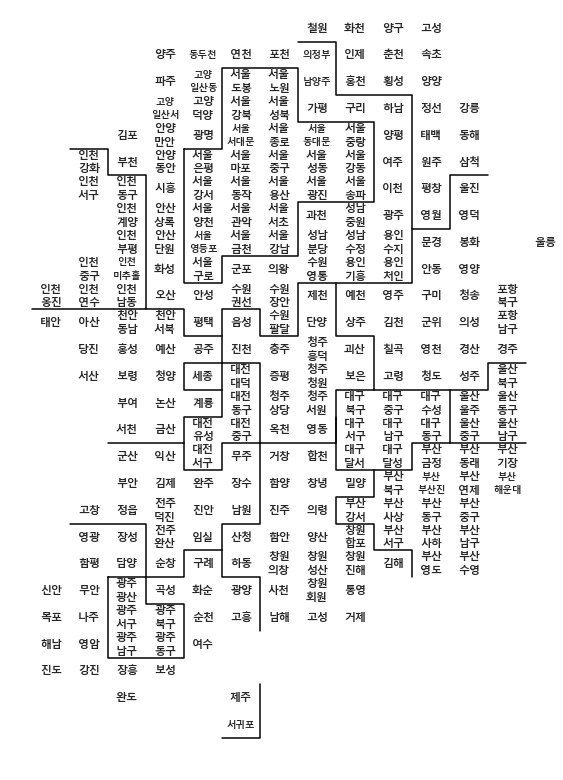

In [20]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                 fontsize = fontsize, ha = 'center', va = 'center', 
                 linespacing = linespacing)

# 시도 경계를 그림
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [22]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시군구,행정구,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉,3,11
1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원),0,10
2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해,4,11
3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척,5,11
4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초,1,10


In [23]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData])-
                     min(blockedMap[targetData]))*0.25+min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    #지역이름표시
    for idx, row in blockedMap.iterrows():
        if len(row.ID.split()) == 2:
            dispname = f'{row.ID.split()[0]} \n {row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 3글자 이상인곳 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1
        
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', 
                    fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

### 인구 현황 및 인구소멸지역 확인하기

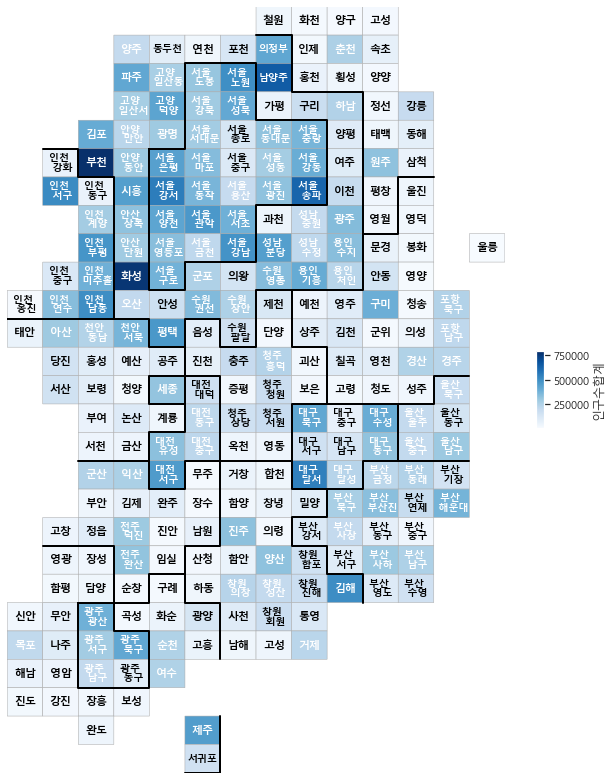

In [24]:
drawKorea('인구수합계', pop, 'Blues')

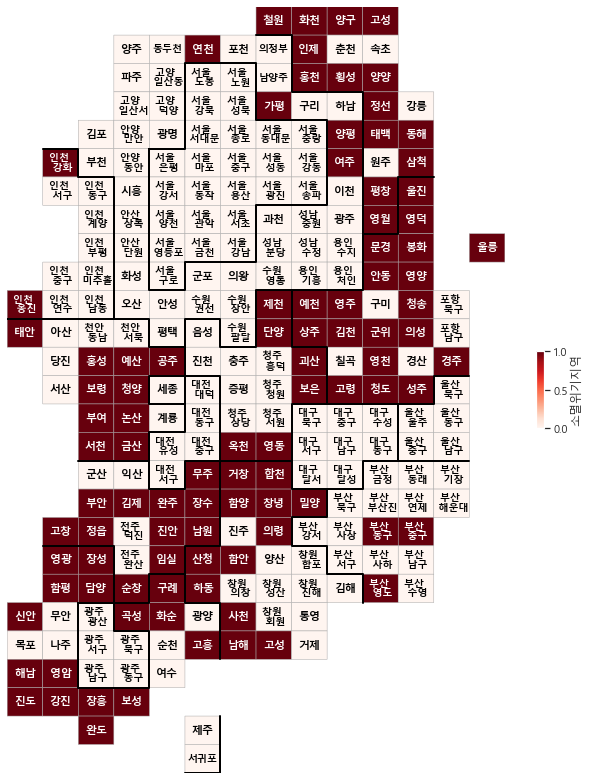

In [25]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

###  여성 인구 비율 확인하기

In [26]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([np.abs(min(blockedMap[targetData])),
                   np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    #지역이름표시
    for idx, row in blockedMap.iterrows():
        if len(row.ID.split()) == 2:
            dispname = f'{row.ID.split()[0]} \n {row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 3글자 이상인곳 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1
        
        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', 
                    fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

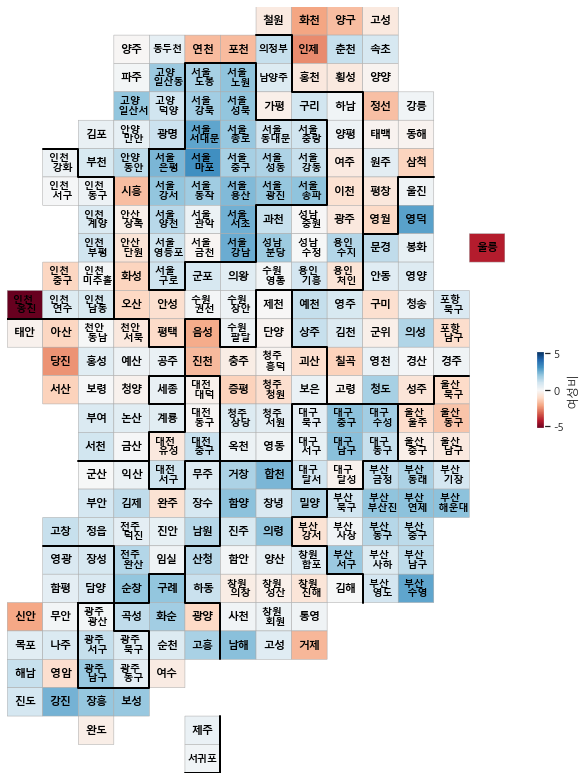

In [27]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

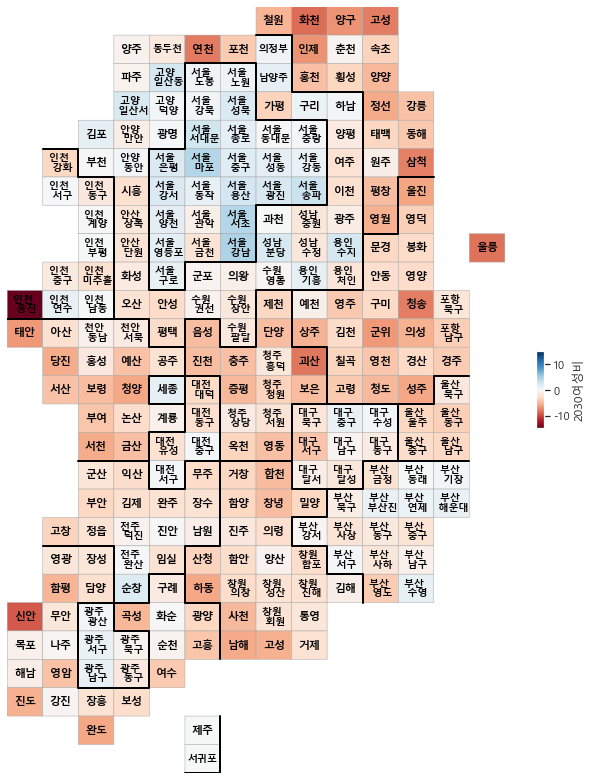

In [28]:
pop['2030여성비'] = (pop['20~39세여자']/pop['20~39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

### Folium으로 표시하기

In [29]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시군구,행정구,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,
강릉,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,0,3,11,0.184431,-4.370979
고성(강원),강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,1,0,10,-0.518606,-7.588617
동해,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,1,4,11,-0.177618,-3.957452
삼척,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,1,5,11,-1.153915,-7.515288
속초,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,0,1,10,0.868916,-3.471873


In [30]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'RdBu',
               key_on = 'feature.id')

map

In [32]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'Pastel2',
               key_on = 'feature.id')
map

In [33]:
draw_korea.to_csv('./data/05_draw_korea.csv', encoding='utf8', sep=',')